In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import _sequential
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import fetch_kddcup99

In [2]:
baseball = pd.read_csv('/Users/anthonyesposito/Desktop/GitWork/Work_In_Progress/Courses/ISLR/Practice_Problems/BaseballData.csv').drop('Unnamed: 0', axis=1)

In [3]:
career = baseball['playerID'].value_counts()!=1
careerdict = career.to_dict()
baseball['career'] = baseball['playerID'].map(careerdict)
baseball2 = baseball.query('career == True')
baseball3 = baseball.query('R > 10')

In [14]:
X = baseball3.drop(['teamID', 'lgID', 'salary', 'salaryADJ', 'career'], axis=1)
y = baseball3['salaryADJ']
X['year'] = X['yearID']
X = X.set_index(['playerID', 'year'])
Xbat = X.iloc[:, [21,22,23,24,26,27,30,31,35]]

In [15]:
for i in range(len(baseball.columns)):
    print(i , ' ', baseball.columns[i])

0   playerID
1   yearID
2   stint
3   teamID
4   lgID
5   G
6   AB
7   R
8   H
9   2B
10   3B
11   HR
12   RBI
13   SB
14   CS
15   BB
16   SO
17   IBB
18   HBP
19   SH
20   SF
21   GIDP
22   AVG
23   CG
24   CAB
25   CR
26   CH
27   C2B
28   C3B
29   CHR
30   CRBI
31   CSB
32   CCS
33   CBB
34   CSO
35   CIBB
36   CHBP
37   CSH
38   CSF
39   CGIDP
40   CAVG
41   salary
42   salaryADJ
43   career


In [16]:
print(baseball.shape, baseball2.shape)

(19858, 44) (18764, 44)


In [17]:
baseball3

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CSO,CIBB,CHBP,CSH,CSF,CGIDP,CAVG,salary,salaryADJ,career
5,abbotje01,1998,1,CHA,AL,89,244,33,68,14,...,34.0,1.0,0.0,2.0,5.0,5.0,0.276596,175000,263025.0,True
7,abbotje01,2000,1,CHA,AL,80,215,31,59,15,...,84.0,2.0,2.0,5.0,7.0,11.0,0.263538,255000,372300.0,True
10,abbotku01,1993,1,OAK,AL,20,61,11,15,1,...,20.0,0.0,0.0,3.0,0.0,3.0,0.245902,109000,177888.0,True
11,abbotku01,1994,1,FLO,NL,101,345,41,86,17,...,118.0,1.0,5.0,6.0,2.0,8.0,0.248768,109000,174945.0,True
12,abbotku01,1995,1,FLO,NL,120,420,60,107,18,...,228.0,5.0,10.0,8.0,7.0,14.0,0.251816,119000,187782.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19852,zuletju01,2001,1,CHN,NL,49,106,11,23,3,...,51.0,1.0,6.0,0.0,1.0,5.0,0.247126,200000,285200.0,False
19853,zuninmi01,2014,1,SEA,AL,131,438,51,87,20,...,207.0,1.0,20.0,0.0,5.0,17.0,0.202946,504100,569128.9,True
19854,zuninmi01,2015,1,SEA,AL,112,350,28,61,11,...,339.0,1.0,25.0,8.0,7.0,23.0,0.192508,523500,586843.5,True
19856,zupcibo01,1992,1,BOS,AL,124,392,46,108,19,...,66.0,1.0,4.0,8.0,4.0,6.0,0.268585,109000,181049.0,True


/Users/anthonyesposito/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


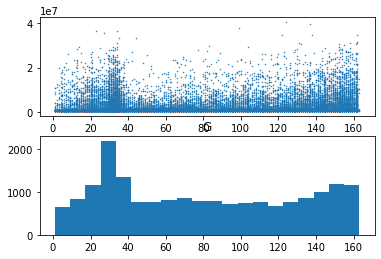

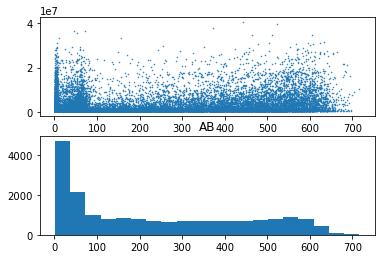

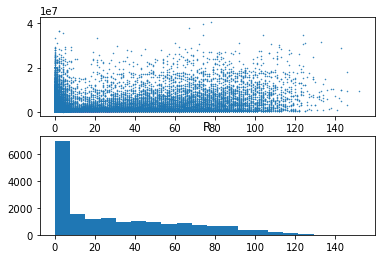

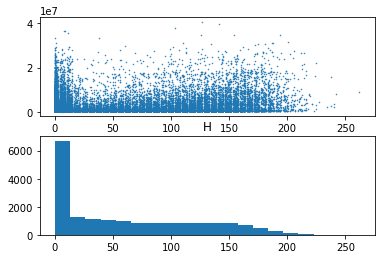

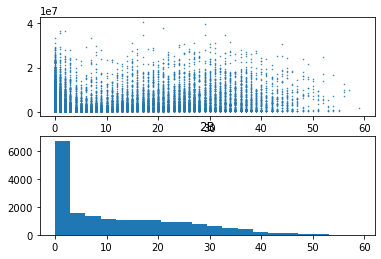

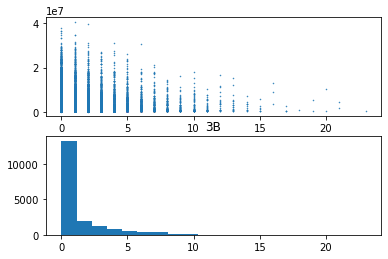

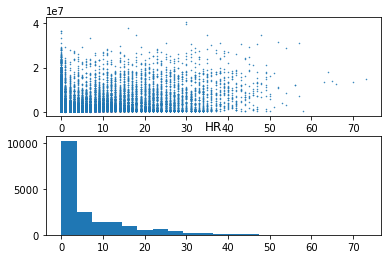

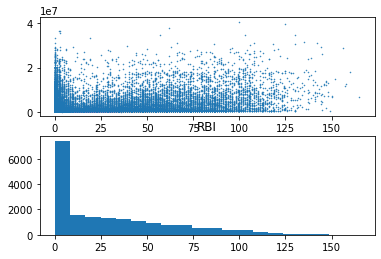

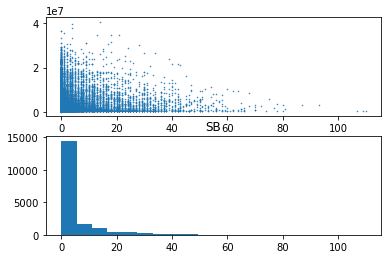

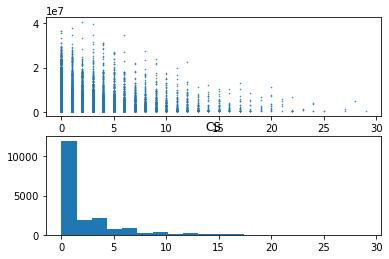

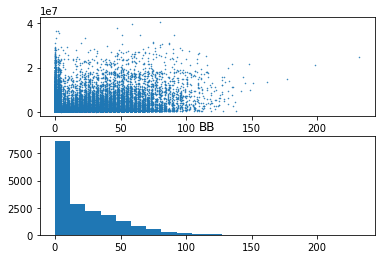

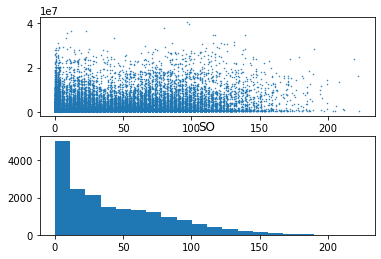

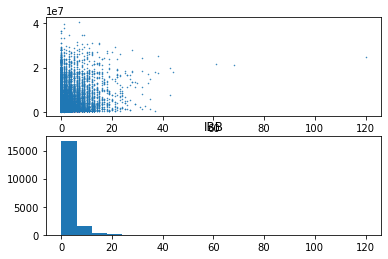

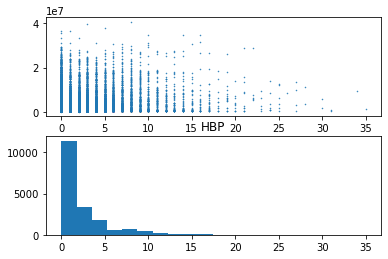

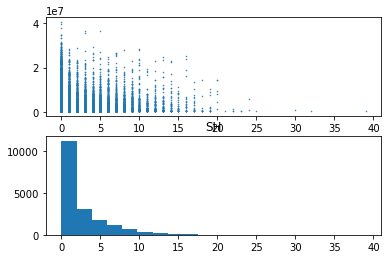

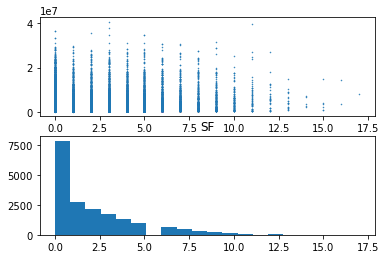

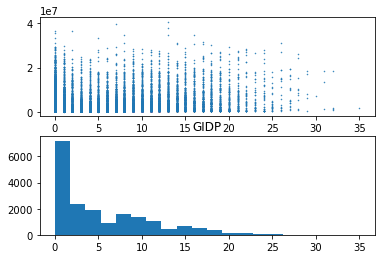

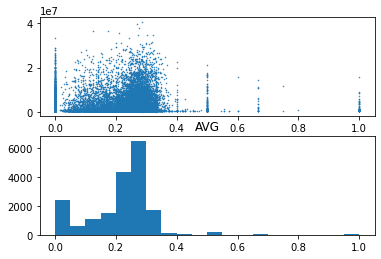

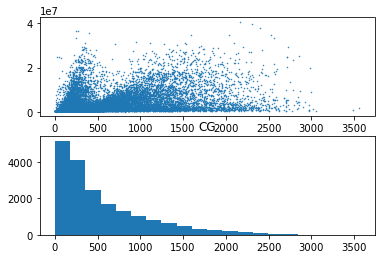

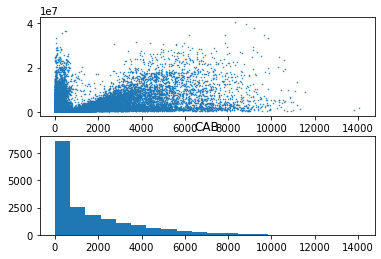

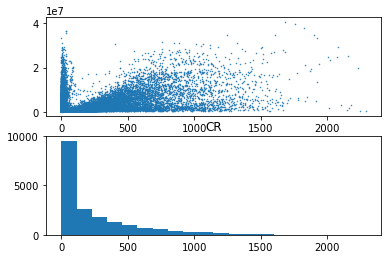

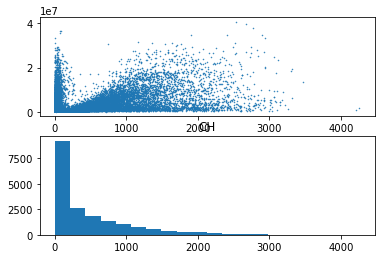

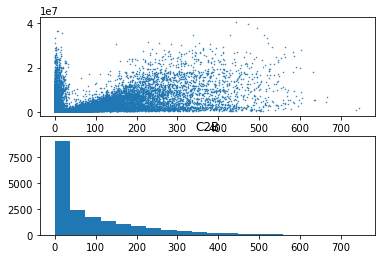

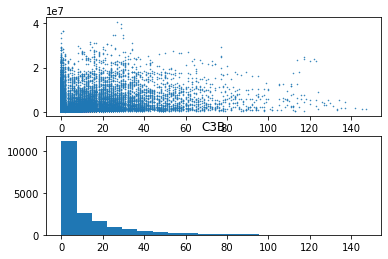

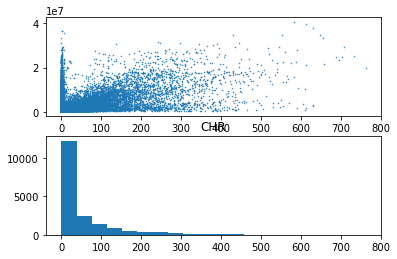

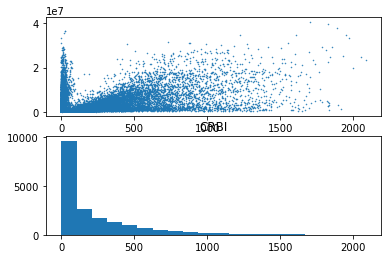

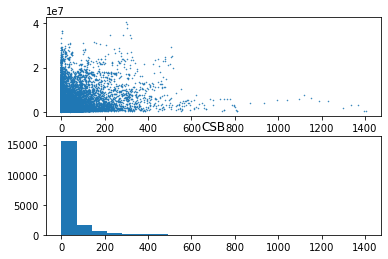

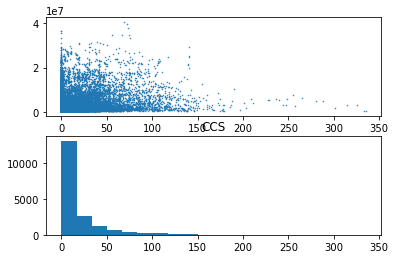

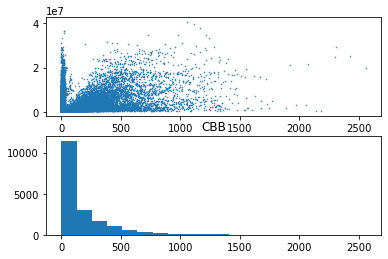

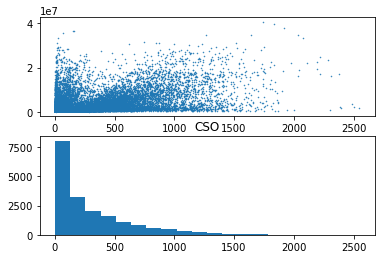

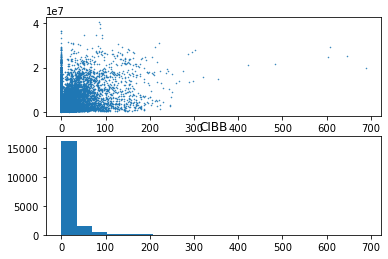

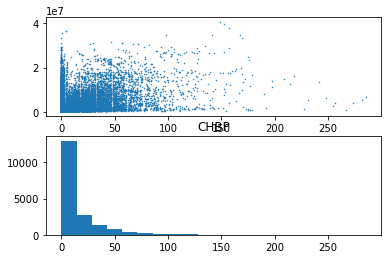

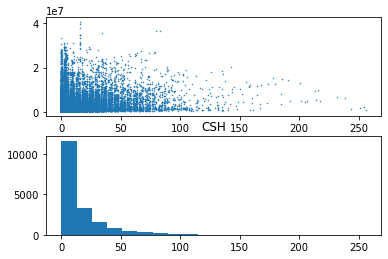

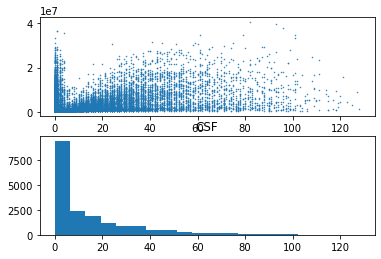

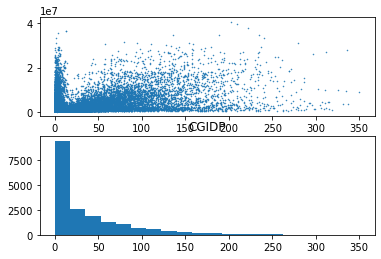

In [18]:
for i in baseball2.columns[5:-4]:
    plt.figure()
    plt.subplot(211)
    plt.plot(baseball2[i], baseball2['salaryADJ'], '.', markersize=1, )
    plt.subplot(212)
    plt.hist(baseball2[i], bins=20)
    plt.title(i)

/Users/anthonyesposito/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


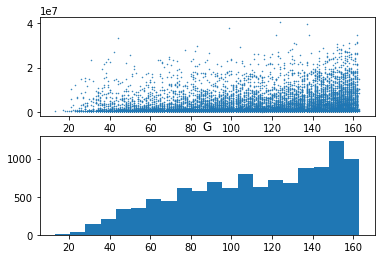

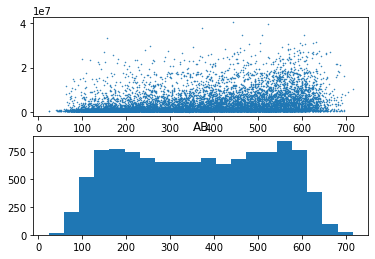

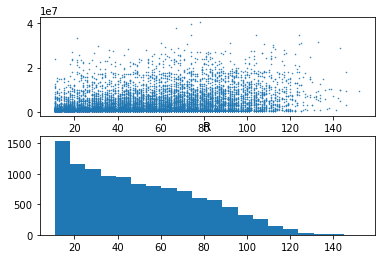

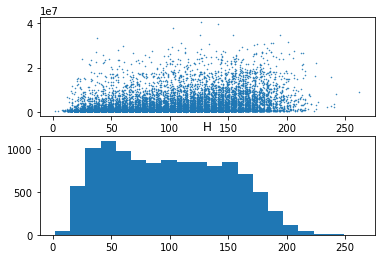

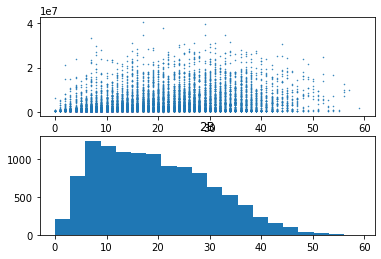

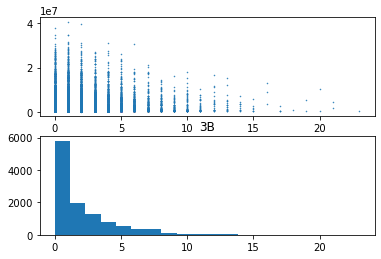

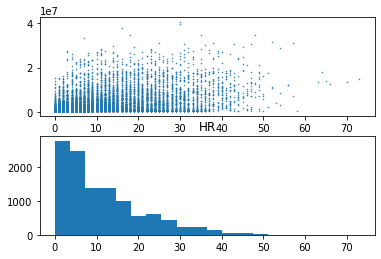

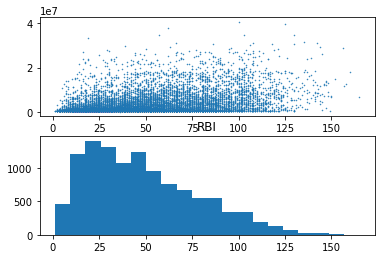

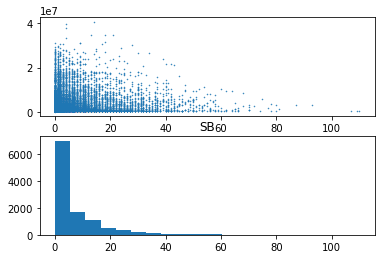

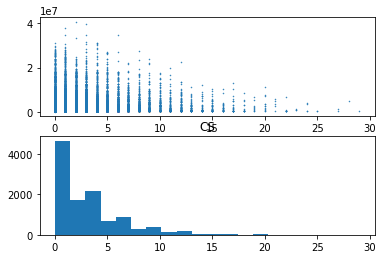

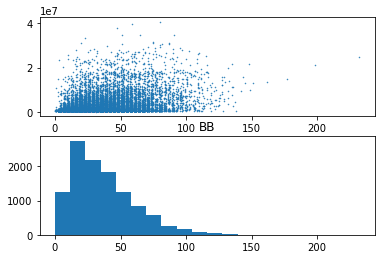

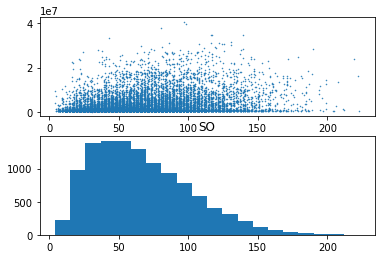

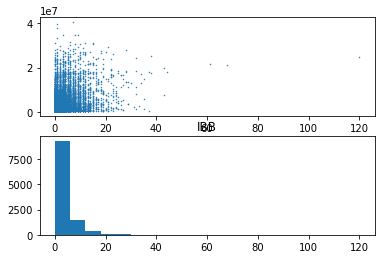

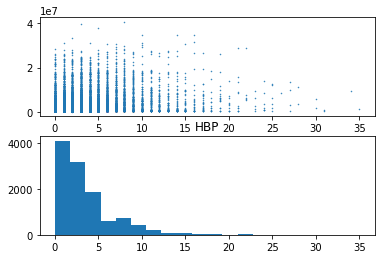

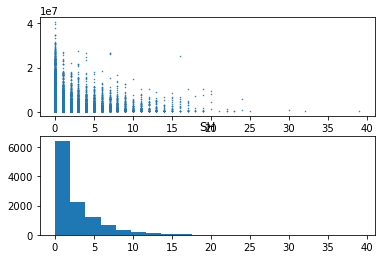

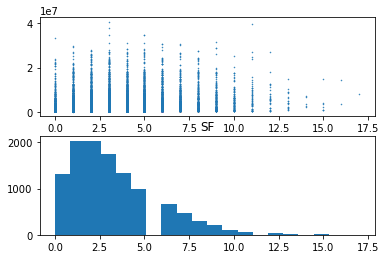

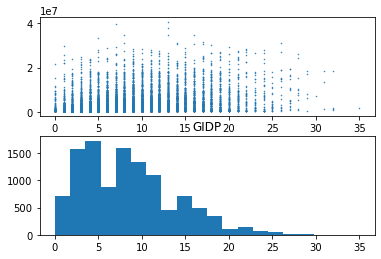

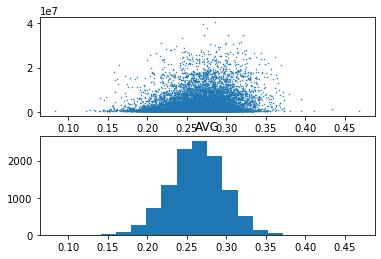

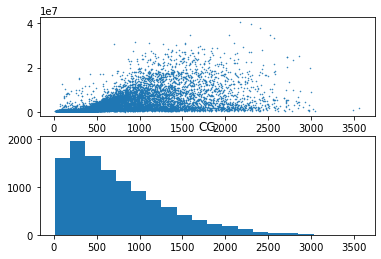

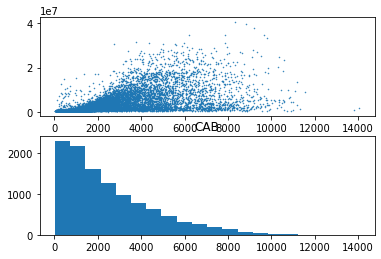

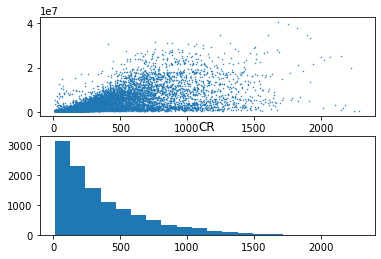

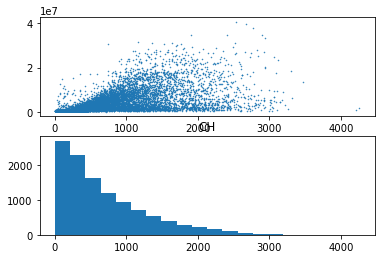

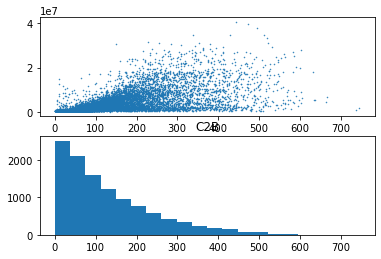

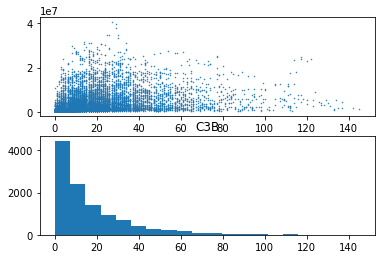

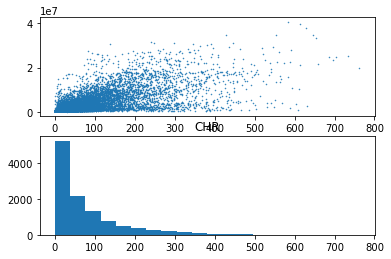

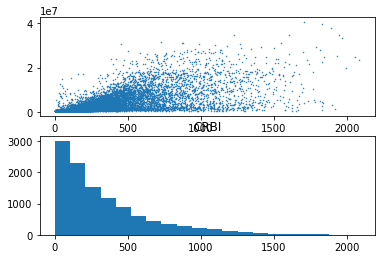

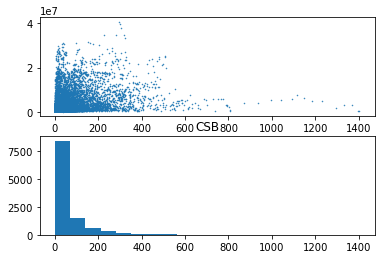

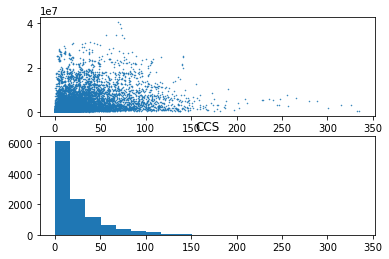

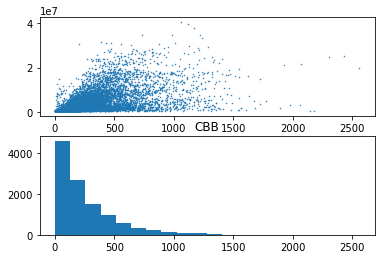

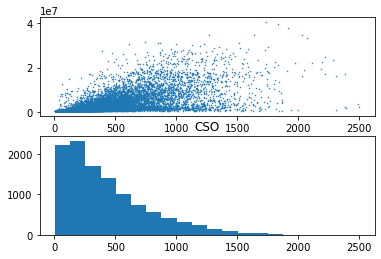

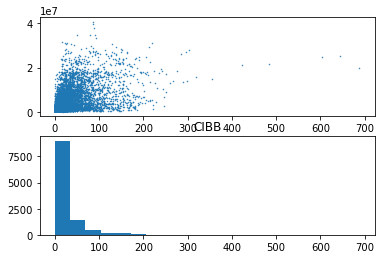

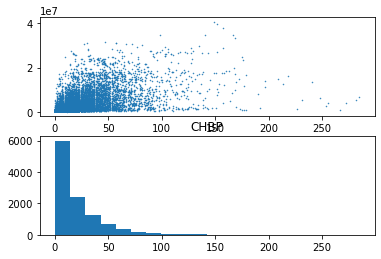

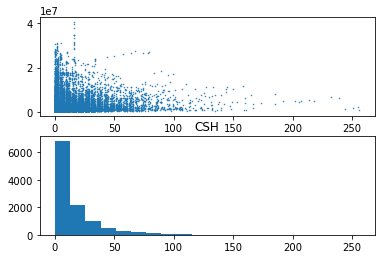

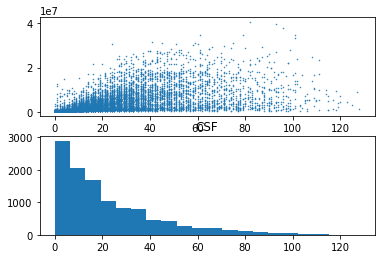

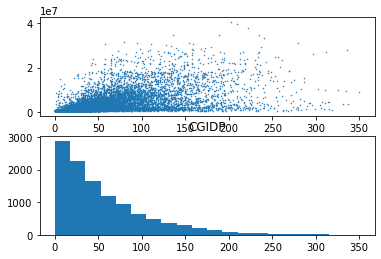

In [19]:
for i in baseball3.columns[5:-4]:
    plt.figure()
    plt.subplot(211)
    plt.plot(baseball3[i], baseball3['salaryADJ'], '.', markersize=1, )
    plt.subplot(212)
    plt.hist(baseball3[i], bins=20)
    plt.title(i)

/Users/anthonyesposito/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


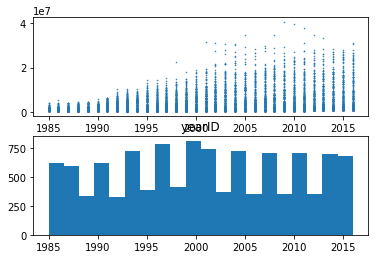

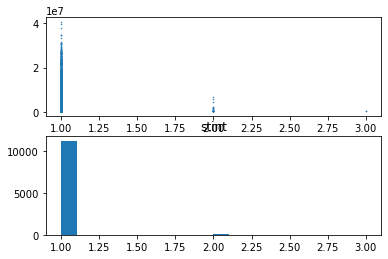

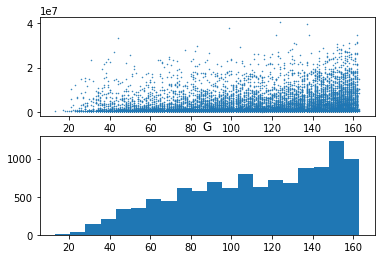

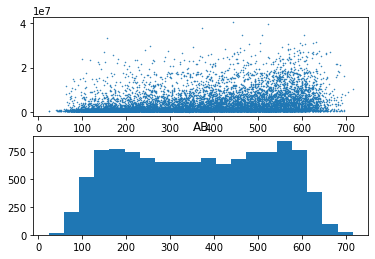

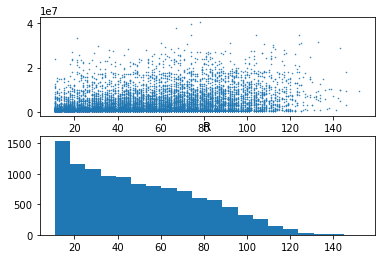

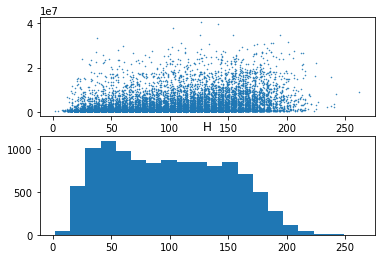

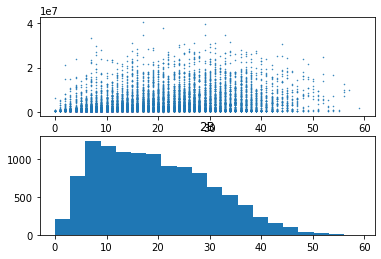

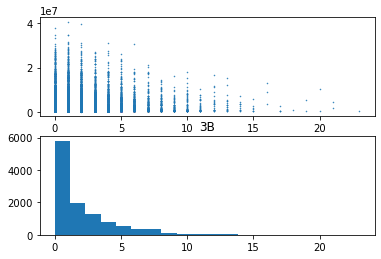

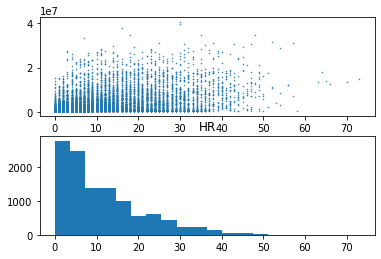

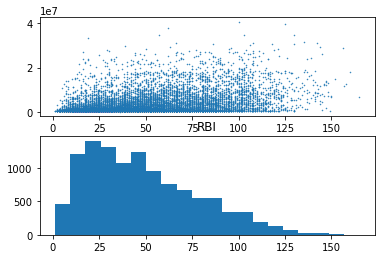

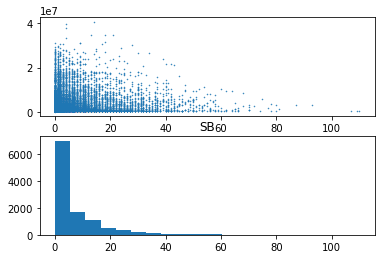

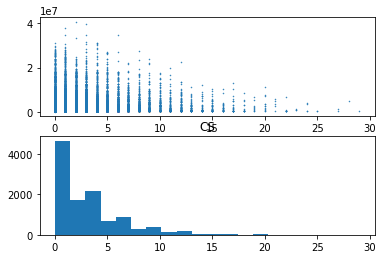

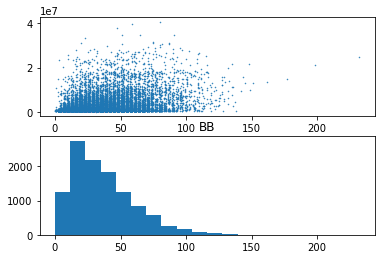

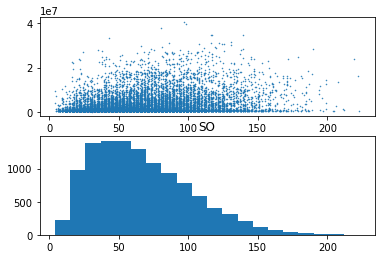

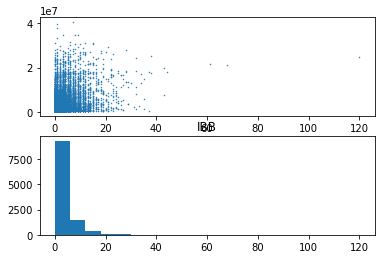

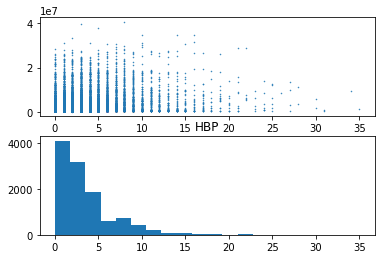

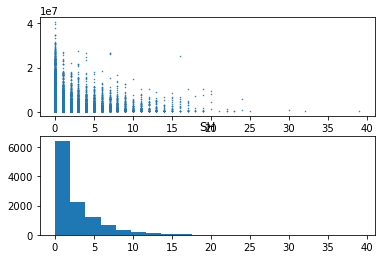

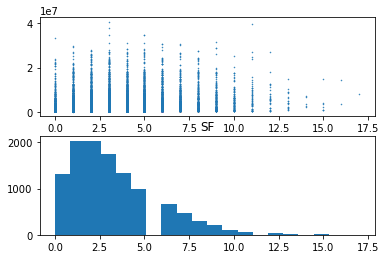

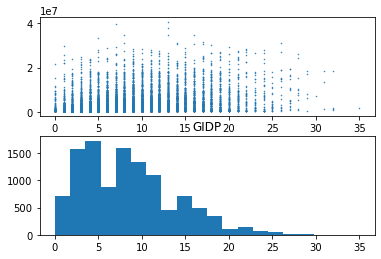

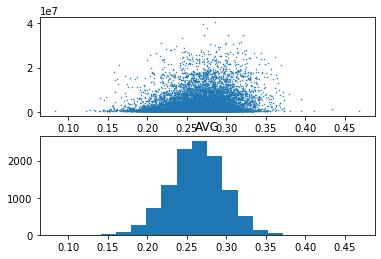

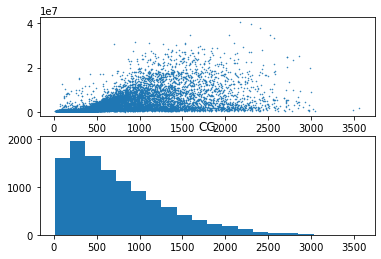

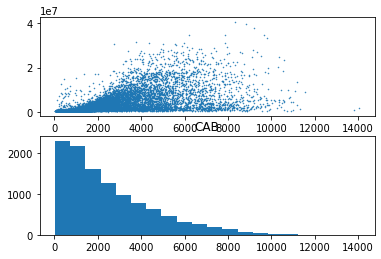

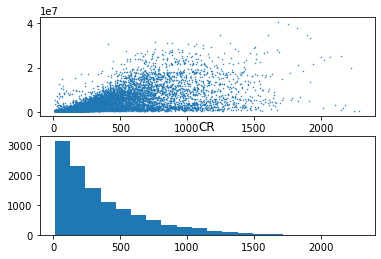

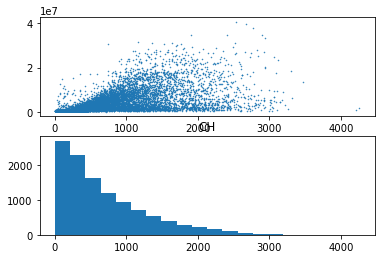

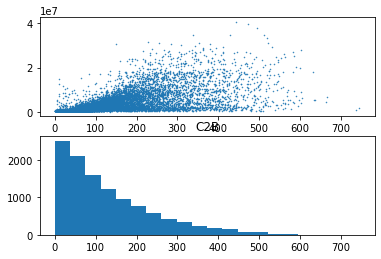

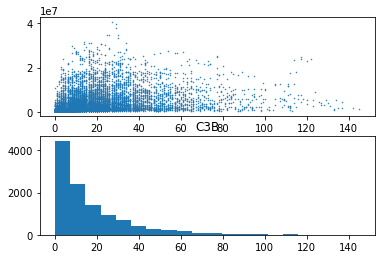

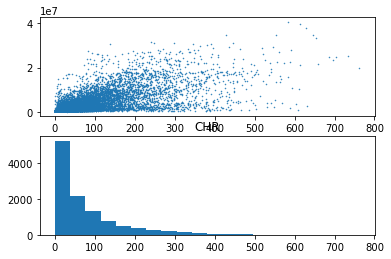

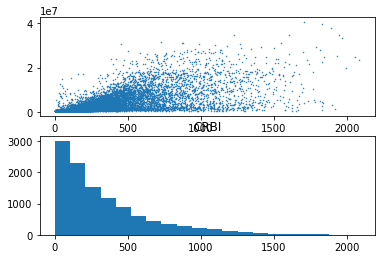

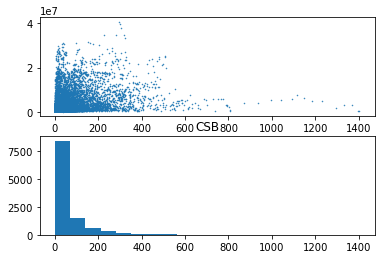

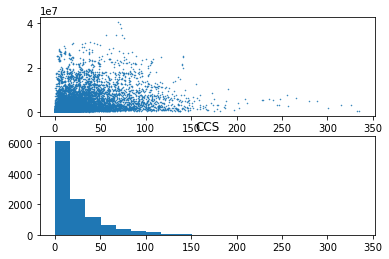

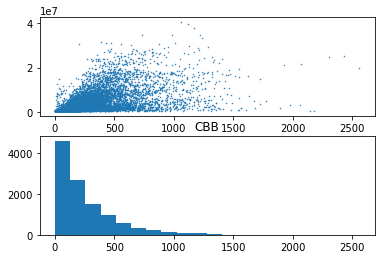

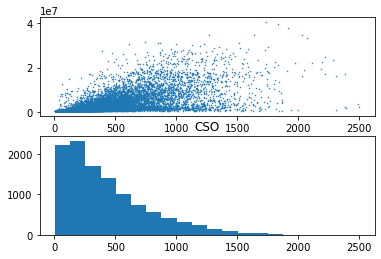

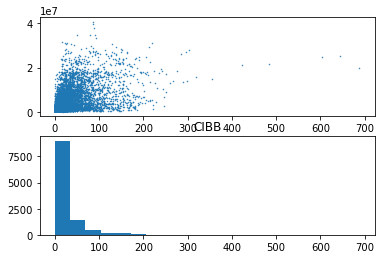

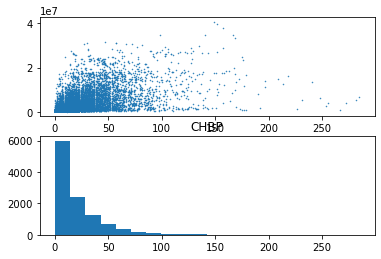

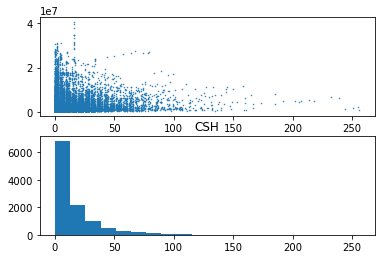

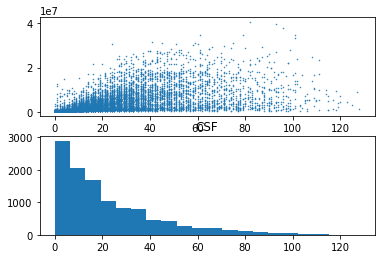

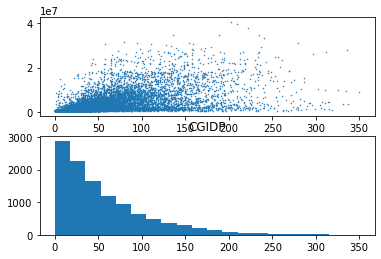

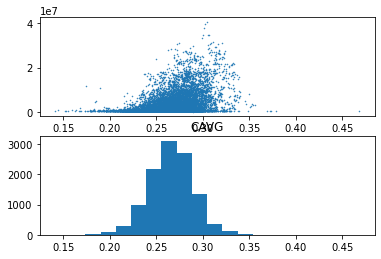

In [20]:
for i in X.columns:
    plt.figure()
    plt.subplot(211)
    plt.plot(X[i], y, '.', markersize=1, )
    plt.subplot(212)
    plt.hist(X[i], bins=20)
    plt.title(i)

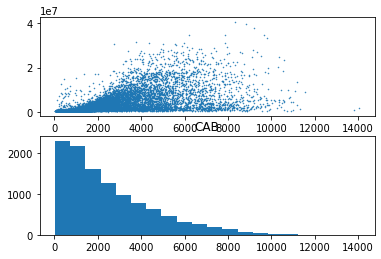

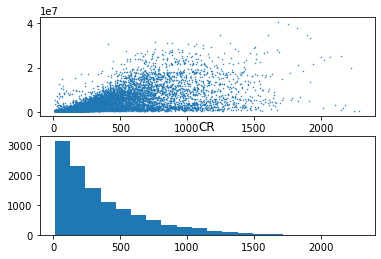

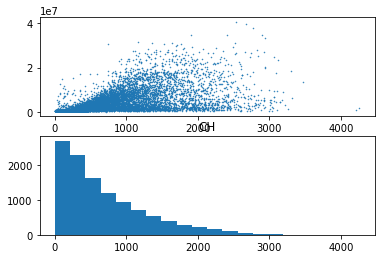

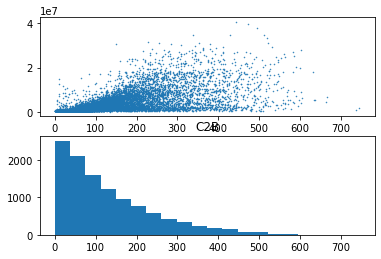

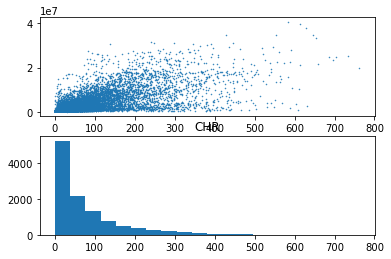

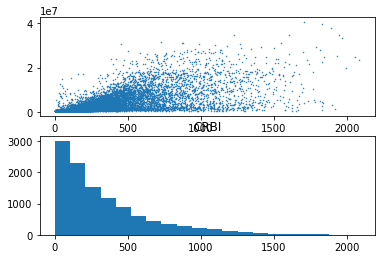

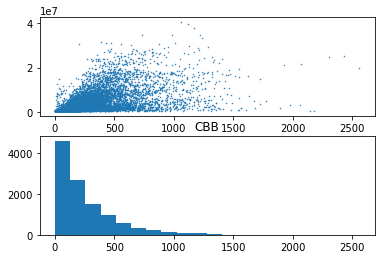

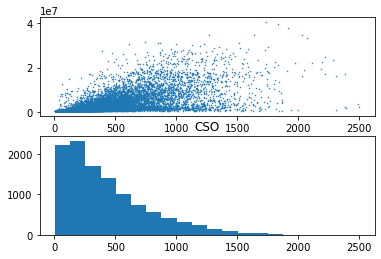

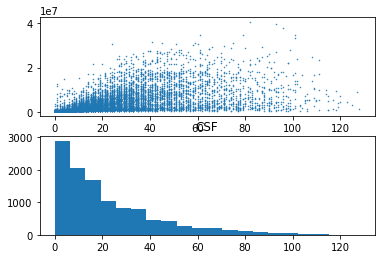

In [21]:
for i in Xbat.columns:
    plt.figure()
    plt.subplot(211)
    plt.plot(Xbat[i], y, '.', markersize=1, )
    plt.subplot(212)
    plt.hist(Xbat[i], bins=20)
    plt.title(i)

In [25]:
lassoCV = LassoCV(max_iter=10000)

In [322]:
lassoCV.

5807907.919429231

In [26]:
lasso = Lasso(alpha=lassoCV.fit(Xbat,y).alpha_, max_iter=10000)


In [31]:
Kneigh40 = KNeighborsRegressor(n_neighbors=40)

In [27]:
scores = cross_val_score(lasso, Xbat, y, cv=len(y.index)//500)
print('mean: {} , std: {}, var: {}, No.: {}'.format(scores.mean(), scores.std(), scores.var(), len(scores)))

mean: 0.5167415037645914 , std: 0.10504777520621965, var: 0.011035035075776455, No.: 22


In [42]:
scores = cross_val_score(KNeighborsRegressor(n_neighbors=20), Xbat, y, cv=len(y.index)//2000)
print('mean: {} , std: {}, var: {}, No.: {}'.format(scores.mean(), scores.std(), scores.var(), len(scores)))

mean: 0.535473547257573 , std: 0.027242056050541134, var: 0.0007421296178608249, No.: 5


In [368]:
print(Xtrans[:,0].shape, y.shape)

(11323,) (11323,)


In [333]:
for i in range(len(X.columns)):
    print(i, X.columns[i])

0 yearID
1 stint
2 G
3 AB
4 R
5 H
6 2B
7 3B
8 HR
9 RBI
10 SB
11 CS
12 BB
13 SO
14 IBB
15 HBP
16 SH
17 SF
18 GIDP
19 AVG
20 CG
21 CAB
22 CR
23 CH
24 C2B
25 C3B
26 CHR
27 CRBI
28 CSB
29 CCS
30 CBB
31 CSO
32 CIBB
33 CHBP
34 CSH
35 CSF
36 CGIDP
37 CAVG


In [12]:
Xbat = X.iloc[:, [21,22,23,24,26,27,30,31,35]]

In [385]:
Xpca = PCA(n_components=2).fit(Xbat)

In [386]:
Xtrans = Xpca.transform(Xbat)

In [387]:
Xtrans[:, 1].shape

(11323,)

In [388]:
X.shape

(11323, 38)

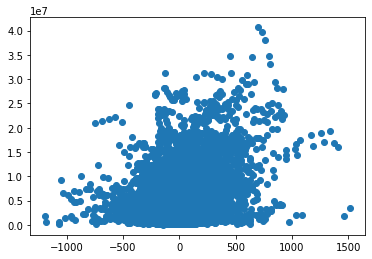

In [404]:
plt.scatter(Xtrans[:, 1], y)

In [403]:
Xpca.explained_variance_ratio_

array([0.98722967, 0.00705888])